In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [2]:
mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
mnist.train.num_examples

55000

In [4]:
mnist.test.num_examples

10000

In [5]:
mnist.train.images

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
mnist.train.images[1].shape

(784,)

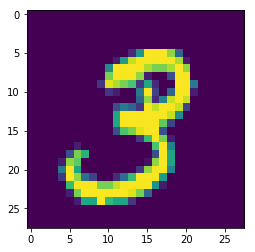

In [8]:
plt.imshow(mnist.train.images[1].reshape(28,28))

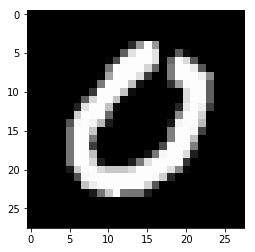

In [9]:
plt.imshow(mnist.train.images[7].reshape(28,28), cmap='gist_gray')

In [10]:
x = tf.placeholder(tf.float32, shape=[None,784])
w = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))
y = tf.matmul(x,w) + b
y_true = tf.placeholder(tf.float32, shape=[None,10])

In [11]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true, 
                                                             logits=y))

In [12]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)
train = optimizer.minimize(cross_entropy)

In [13]:
init = tf.global_variables_initializer()

In [14]:
with tf.Session() as sess:
    sess.run(init)
    epochs = 1000
    for epoch in range(epochs):
        x_batch, y_batch = mnist.train.next_batch(100)
        
        sess.run(train,feed_dict = {x : x_batch, y_true : y_batch})
    
    matches = tf.equal(tf.argmax(y,1), tf.argmax(y_true,1))
    # [True,False,True,True....] => [1,0,1,1]
    acc = tf.reduce_mean(tf.cast(matches, tf.float32))
    print(sess.run(acc, feed_dict = {x : mnist.test.images, 
                               y_true : mnist.test.labels}))

0.9179


In [15]:
mnist.test.images.shape

(10000, 784)

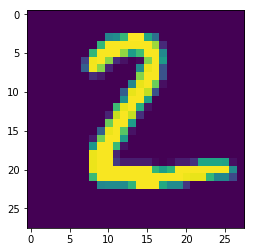

In [16]:
plt.imshow(mnist.test.images[1].reshape(28,28))

In [17]:
import cv2

In [18]:
image = cv2.imread('3.png', cv2.COLOR_BGR2GRAY)

In [19]:
image.shape

(159, 121, 3)

In [20]:
image = cv2.resize(image,(28,28))

In [21]:
image.shape

(28, 28, 3)

In [22]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [23]:
image.shape

(28, 28)

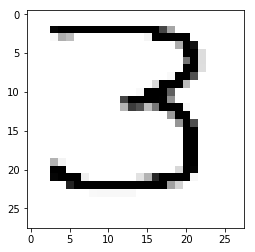

In [24]:
plt.imshow(image, cmap='gist_gray')

In [25]:
image = image.flatten()
image.shape

(784,)

In [26]:
with tf.Session() as sess:
    sess.run(init)
    
    prediction=tf.argmax(y,1)
    best = sess.run([prediction],feed_dict={x : image.reshape(1,784)})
    print(best)

[array([0], dtype=int64)]
